In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('Fraud.csv')


In [3]:
print(data.head())
print(data.info())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 co

In [4]:
data_cleaned = data.drop(columns=['newbalanceOrig', 'newbalanceDest'])

In [5]:
data_cleaned['type'] = data_cleaned['type'].map({'CASH_IN': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'PAYMENT': 4, 'TRANSFER': 5})


In [6]:
X = data_cleaned.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'])
y = data_cleaned['isFraud']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


In [10]:
y_pred = rf_model.predict(X_test)

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[314217      7]
 [   109    240]]


In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.97      0.69      0.81       349

    accuracy                           1.00    314573
   macro avg       0.99      0.84      0.90    314573
weighted avg       1.00      1.00      1.00    314573



In [13]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [14]:
print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 0.8438284029964352


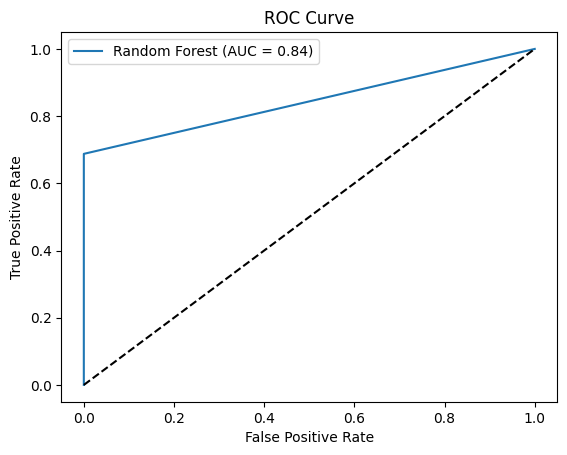

In [15]:
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [16]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

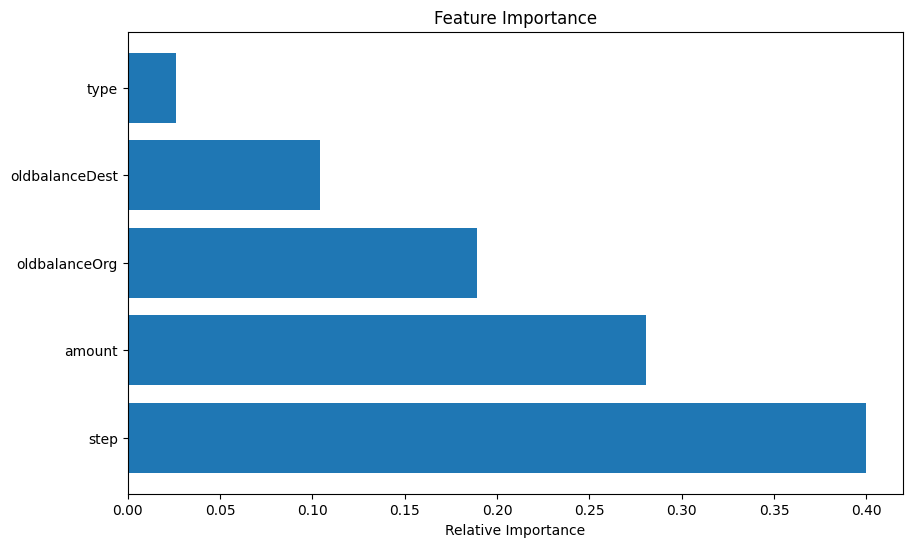

In [17]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Relative Importance')
plt.show()